In [832]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
a=pd.read_csv("titanic.csv")
a.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<AxesSubplot:xlabel='Sex', ylabel='count'>

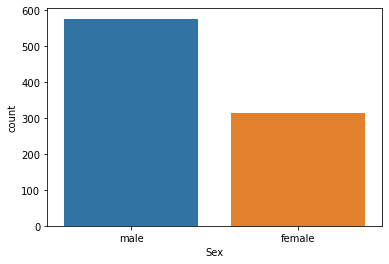

In [833]:
sns.countplot(x="Sex",data=a)

<AxesSubplot:ylabel='Sex'>

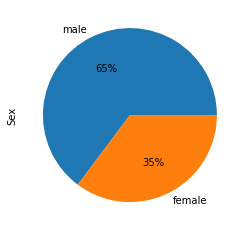

In [834]:
a['Sex'].value_counts().plot(kind="pie",autopct='%1.f%%')

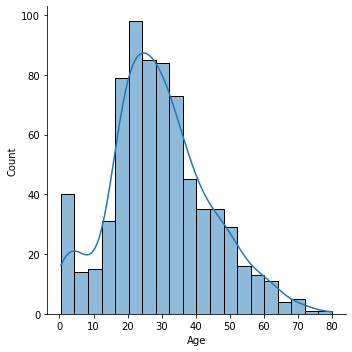

In [835]:
sns.displot(a['Age'],kind='hist',kde=True)

# Zscore

In [836]:
abc=pd.read_csv("placement.csv")
abc

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0
...,...,...,...
995,8.87,44.0,1
996,9.12,65.0,1
997,4.89,34.0,0
998,8.62,46.0,1


In [837]:
abc.describe()

,cgpa,placement_exam_marks,placed
count,1000.000000,1000.000000,1000.000000
mean,6.961240,32.225000,0.489000
std,0.615898,19.130822,0.500129
min,4.890000,0.000000,0.000000
25%,6.550000,17.000000,0.000000
50%,6.960000,28.000000,0.000000
75%,7.370000,44.000000,1.000000
max,9.120000,100.000000,1.000000


C:\Users\Hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='cgpa'>

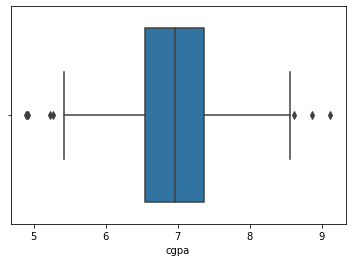

In [838]:
sns.boxplot(abc['cgpa'])

C:\Users\Hp\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='cgpa', ylabel='Density'>

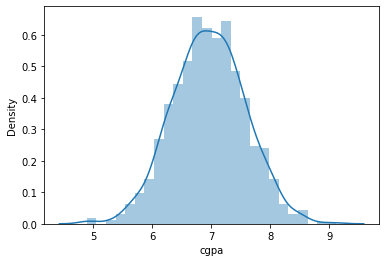

In [839]:
sns.distplot(abc['cgpa'])

In [840]:
abc['cgpa'].skew()

-0.014529938929314918

In [841]:
abc['Zscore']=(abc['cgpa']- abc['cgpa'].mean()) /abc['cgpa'].std()
abc['Zscore']

0      0.371425
1      0.809810
2      0.939701
3     -0.878782
4      0.436371
         ...   
995    3.099150
996    3.505062
997   -3.362960
998    2.693239
999   -3.346724
Name: Zscore, Length: 1000, dtype: float64

In [842]:
abc[abc['Zscore']>3]

,cgpa,placement_exam_marks,placed,Zscore
995,8.87,44.0,1,3.099150
996,9.12,65.0,1,3.505062


In [843]:
abc[abc['Zscore']<-3]

,cgpa,placement_exam_marks,placed,Zscore
485,4.92,44.0,1,-3.314251
997,4.89,34.0,0,-3.362960
999,4.90,10.0,1,-3.346724


In [844]:
abc[(abc['cgpa']>3) | (abc['cgpa']<-3)]

,cgpa,placement_exam_marks,placed,Zscore
0,7.19,26.0,1,0.371425
1,7.46,38.0,1,0.809810
2,7.54,40.0,1,0.939701
3,6.42,8.0,1,-0.878782
4,7.23,17.0,0,0.436371
...,...,...,...,...
995,8.87,44.0,1,3.099150
996,9.12,65.0,1,3.505062
997,4.89,34.0,0,-3.362960
998,8.62,46.0,1,2.693239


In [845]:
d=abc.copy()

In [846]:
ul=d['cgpa'].mean()+3*d['cgpa'].std()
ul


8.808933625397177

In [847]:
ll=d['cgpa'].mean()-3*d['cgpa'].std()
ll

5.113546374602842

In [848]:
d['cgpa']=np.where(
    d['cgpa']>ul,
        ul,
    np.where(d['cgpa']<ll,
    ll,
    d['cgpa']))

C:\Users\Hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='cgpa'>

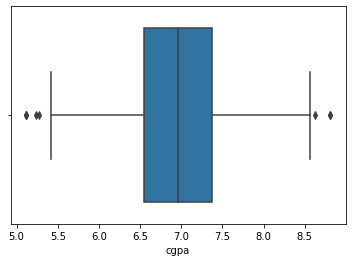

In [849]:
sns.boxplot(d['cgpa'])

In [850]:
po=pd.read_csv("titanic.csv")

In [851]:
po

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [852]:
po.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


C:\Users\Hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age'>

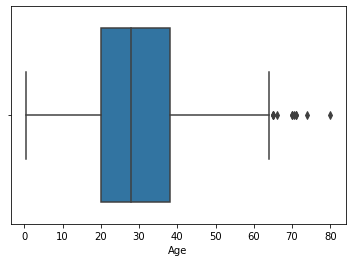

In [853]:
sns.boxplot(po['Age'])

In [854]:
po['z']=(po['Age']-po['Age'].mean())/po['Age'].std()

In [855]:
po[po['z']>3]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,z
630,631,1,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.0,0,0,27042,30.000,A23,S,3.462699
851,852,0,3,"Svensson, Mr. Johan",male,74.0,0,0,347060,7.775,NaN,S,3.049660


In [856]:
po[po['z']<-3]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,z


In [857]:
de=po.copy()

In [858]:
ul=de['Age'].mean()+3*de['Age'].std()
ul

73.27860964406095

In [859]:
ll=de['Age'].mean()-3*de['Age'].std()
ll

-13.88037434994331

In [860]:
de['Age']=np.where(
    de['Age']>ul,
    ul,
    np.where(
    de['Age']<ll,
    ll,
    de['Age']))

C:\Users\Hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age'>

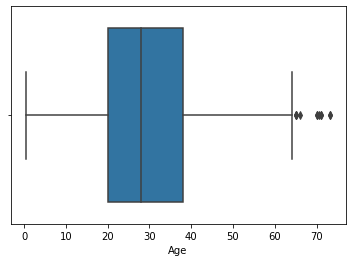

In [861]:
sns.boxplot(de['Age'])

# Quantile method

In [862]:
df=pd.read_csv("placement.csv")
df

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0
...,...,...,...
995,8.87,44.0,1
996,9.12,65.0,1
997,4.89,34.0,0
998,8.62,46.0,1


In [863]:
df.describe()

,cgpa,placement_exam_marks,placed
count,1000.000000,1000.000000,1000.000000
mean,6.961240,32.225000,0.489000
std,0.615898,19.130822,0.500129
min,4.890000,0.000000,0.000000
25%,6.550000,17.000000,0.000000
50%,6.960000,28.000000,0.000000
75%,7.370000,44.000000,1.000000
max,9.120000,100.000000,1.000000


C:\Users\Hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='cgpa'>

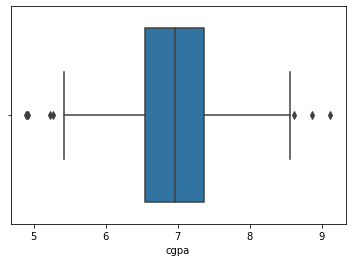

In [864]:
sns.boxplot(df['cgpa'])

C:\Users\Hp\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='cgpa', ylabel='Density'>

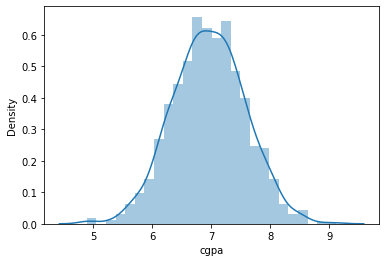

In [865]:
sns.distplot(df['cgpa'])

In [866]:
Q1=df['cgpa'].quantile(0.25)
Q1

6.55

In [867]:
Q3=df['cgpa'].quantile(0.75)
Q3

7.37

In [868]:
IQR=Q3-Q1
IQR

0.8200000000000003

In [869]:
UL=Q3+1.5*IQR
UL

8.600000000000001

In [870]:
LL=Q1-1.5*IQR
LL

5.319999999999999

In [871]:
B=df.copy()

In [872]:
df['cgpa']=np.where(
    df['cgpa']>UL,
    UL,
    np.where(
    df['cgpa']<LL,
    LL,
    df['cgpa']))

C:\Users\Hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='cgpa'>

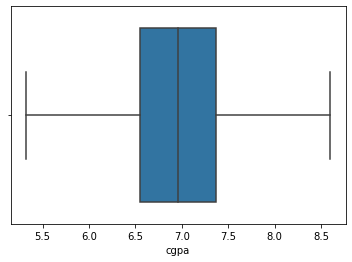

In [873]:
sns.boxplot(df['cgpa'])

In [874]:
a=pd.read_csv("titanic.csv")

In [875]:
a

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [876]:
a.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


C:\Users\Hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age'>

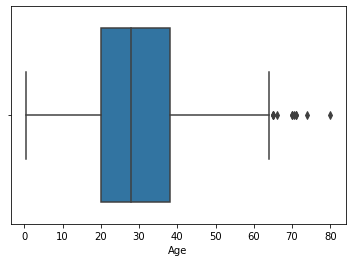

In [877]:
sns.boxplot(a['Age'])

C:\Users\Hp\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

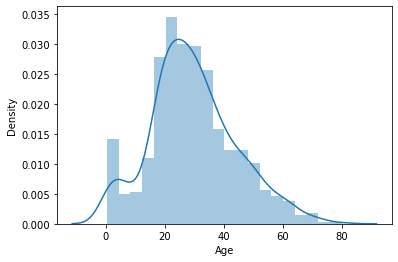

In [878]:
sns.distplot(a['Age'])

In [879]:
Q1=a['Age'].quantile(0.25)
Q1

20.125

In [880]:
Q3=a['Age'].quantile(0.75)
Q3

38.0

In [881]:
IQR=Q3-Q1
IQR

17.875

In [882]:
ul=Q3+1.5*IQR
ul

64.8125

In [883]:
ll=Q1-1.5*IQR
ll

-6.6875

In [884]:
a[(a['Age']>ul) | (a['Age']<ll)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
33,34,0,2,"Wheadon, Mr. Edward H",male,66.0,0,0,C.A. 24579,10.5000,NaN,S
54,55,0,1,"Ostby, Mr. Engelhart Cornelius",male,65.0,0,1,113509,61.9792,B30,C
96,97,0,1,"Goldschmidt, Mr. George B",male,71.0,0,0,PC 17754,34.6542,A5,C
116,117,0,3,"Connors, Mr. Patrick",male,70.5,0,0,370369,7.7500,NaN,Q
280,281,0,3,"Duane, Mr. Frank",male,65.0,0,0,336439,7.7500,NaN,Q
456,457,0,1,"Millet, Mr. Francis Davis",male,65.0,0,0,13509,26.5500,E38,S
493,494,0,1,"Artagaveytia, Mr. Ramon",male,71.0,0,0,PC 17609,49.5042,NaN,C
630,631,1,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.0,0,0,27042,30.0000,A23,S
672,673,0,2,"Mitchell, Mr. Henry Michael",male,70.0,0,0,C.A. 24580,10.5000,NaN,S
745,746,0,1,"Crosby, Capt. Edward Gifford",male,70.0,1,1,WE/P 5735,71.0000,B22,S


In [885]:
b=a.copy()

In [886]:
b['Age']=np.where(
    b['Age']>ul,
    ul,
    np.where(b['Age']<ll,
    ll,
    b['Age']))

C:\Users\Hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age'>

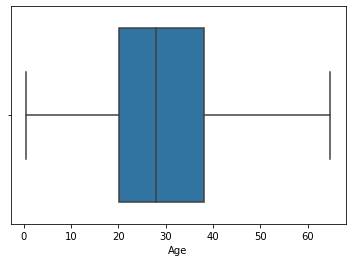

In [887]:
sns.boxplot(b['Age'])

In [888]:
a=pd.read_csv("student1.csv")
a

,Reg_no,Name
0,393CS21707,VARSHA GALAGALI
1,393CS20001,ABHINAV PRASANNA NAIKODI
2,393CS20001,ABHINAV PRASANNA NAIKODI
3,393CS20002,AKASH TORAVI
4,393CS21702,BIRADAR GURURAJ SIDHARUD
5,393CS20005,DUGIWADE PRACHI SANJAY
6,393CS21703,GURUNATH DESHAPANDE
7,393CS20006,HARSHAD MAHAMMADSAB WALIKAR
8,393CS20007,IRAMNAAZ JAMKHANDI
9,393CS20001,ABHINAV PRASANNA NAIKODI


In [889]:
b=pd.read_csv("marks1.csv")
b

,OSA,CN
0,44,45
1,97,47
2,97,47
3,97,52
4,75,21
5,11,23
6,87,92
7,45,78
8,97,17
9,97,47


In [890]:
d=pd.concat([a,b],axis=1)
d

,Reg_no,Name,OSA,CN
0,393CS21707,VARSHA GALAGALI,44,45
1,393CS20001,ABHINAV PRASANNA NAIKODI,97,47
2,393CS20001,ABHINAV PRASANNA NAIKODI,97,47
3,393CS20002,AKASH TORAVI,97,52
4,393CS21702,BIRADAR GURURAJ SIDHARUD,75,21
5,393CS20005,DUGIWADE PRACHI SANJAY,11,23
6,393CS21703,GURUNATH DESHAPANDE,87,92
7,393CS20006,HARSHAD MAHAMMADSAB WALIKAR,45,78
8,393CS20007,IRAMNAAZ JAMKHANDI,97,17
9,393CS20001,ABHINAV PRASANNA NAIKODI,97,47


In [891]:
d.duplicated().sum()

9

In [892]:
d[d.duplicated()]

,Reg_no,Name,OSA,CN
2,393CS20001,ABHINAV PRASANNA NAIKODI,97,47
9,393CS20001,ABHINAV PRASANNA NAIKODI,97,47
33,393CS20018,NEHA PATIL,31,94
39,393CS17018,RAHUL BADAKURI,7,31
44,393CS21707,VARSHA GALAGALI,44,45
45,393CS20008,JAHID ALI BALABATTI,23,45
46,393CS21706,SNEHA ASHOK DODAMANI,4,24
47,393CS20028,SPURTI S PATIL,86,70
48,393CS20030,UMARBIN PATIL,20,11


In [893]:
d.drop_duplicates()

,Reg_no,Name,OSA,CN
0,393CS21707,VARSHA GALAGALI,44,45
1,393CS20001,ABHINAV PRASANNA NAIKODI,97,47
3,393CS20002,AKASH TORAVI,97,52
4,393CS21702,BIRADAR GURURAJ SIDHARUD,75,21
5,393CS20005,DUGIWADE PRACHI SANJAY,11,23
6,393CS21703,GURUNATH DESHAPANDE,87,92
7,393CS20006,HARSHAD MAHAMMADSAB WALIKAR,45,78
8,393CS20007,IRAMNAAZ JAMKHANDI,97,17
10,393CS20008,JAHID ALI BALABATTI,23,45
11,393CS20009,KRISHNA MAHADEV JADHAV,87,65


In [894]:
d['total']=d['OSA']+d['CN']
d['percentage']=d['total']/200*100
d

,Reg_no,Name,OSA,CN,total,percentage
0,393CS21707,VARSHA GALAGALI,44,45,89,44.5
1,393CS20001,ABHINAV PRASANNA NAIKODI,97,47,144,72.0
2,393CS20001,ABHINAV PRASANNA NAIKODI,97,47,144,72.0
3,393CS20002,AKASH TORAVI,97,52,149,74.5
4,393CS21702,BIRADAR GURURAJ SIDHARUD,75,21,96,48.0
5,393CS20005,DUGIWADE PRACHI SANJAY,11,23,34,17.0
6,393CS21703,GURUNATH DESHAPANDE,87,92,179,89.5
7,393CS20006,HARSHAD MAHAMMADSAB WALIKAR,45,78,123,61.5
8,393CS20007,IRAMNAAZ JAMKHANDI,97,17,114,57.0
9,393CS20001,ABHINAV PRASANNA NAIKODI,97,47,144,72.0


In [895]:
ab=pd.DataFrame([
    ["393CS20041","Rahul halli",56,78,153,67.8]
],columns=['Reg_no','Name','OSA','CN','total','percentage'],index=[49])
ab

,Reg_no,Name,OSA,CN,total,percentage
49,393CS20041,Rahul halli,56,78,153,67.8


In [896]:
d.append(ab)

C:\Users\Hp\AppData\Local\Temp\ipykernel_22112\3750493395.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  d.append(ab)


,Reg_no,Name,OSA,CN,total,percentage
0,393CS21707,VARSHA GALAGALI,44,45,89,44.5
1,393CS20001,ABHINAV PRASANNA NAIKODI,97,47,144,72.0
2,393CS20001,ABHINAV PRASANNA NAIKODI,97,47,144,72.0
3,393CS20002,AKASH TORAVI,97,52,149,74.5
4,393CS21702,BIRADAR GURURAJ SIDHARUD,75,21,96,48.0
5,393CS20005,DUGIWADE PRACHI SANJAY,11,23,34,17.0
6,393CS21703,GURUNATH DESHAPANDE,87,92,179,89.5
7,393CS20006,HARSHAD MAHAMMADSAB WALIKAR,45,78,123,61.5
8,393CS20007,IRAMNAAZ JAMKHANDI,97,17,114,57.0
9,393CS20001,ABHINAV PRASANNA NAIKODI,97,47,144,72.0


In [897]:
f=pd.read_csv("wine_data.csv",header=None,usecols=[1,3,4])
f.columns=["Alco","vian","siap"]
f

,Alco,vian,siap
0,14.23,2.43,15.6
1,13.20,2.14,11.2
2,13.16,2.67,18.6
3,14.37,2.50,16.8
4,13.24,2.87,21.0
...,...,...,...
173,13.71,2.45,20.5
174,13.40,2.48,23.0
175,13.27,2.26,20.0
176,13.17,2.37,20.0


In [898]:
f.describe()

,Alco,vian,siap
count,178.000000,178.000000,178.000000
mean,13.000618,2.366517,19.494944
std,0.811827,0.274344,3.339564
min,11.030000,1.360000,10.600000
25%,12.362500,2.210000,17.200000
50%,13.050000,2.360000,19.500000
75%,13.677500,2.557500,21.500000
max,14.830000,3.230000,30.000000


<AxesSubplot:xlabel='Alco', ylabel='Density'>

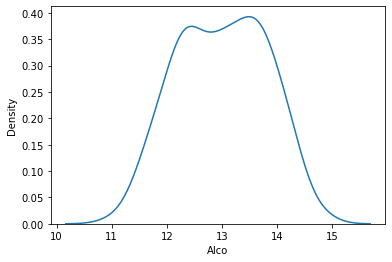

In [899]:
sns.kdeplot(x="Alco",data=f)

<AxesSubplot:xlabel='vian', ylabel='Density'>

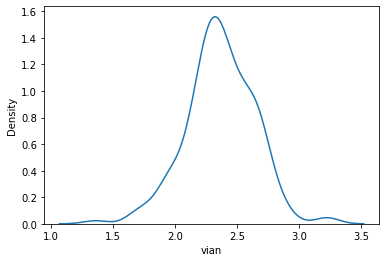

In [900]:
sns.kdeplot(x="vian",data=f)

In [901]:
from sklearn.preprocessing import MinMaxScaler

In [902]:
new=MinMaxScaler()

In [903]:
new.fit(f)

MinMaxScaler()

In [904]:
xlabel=new.transform(f)

In [905]:
xlabel=pd.DataFrame(xlabel,columns=f.columns)

In [906]:
xlabel.head()

,Alco,vian,siap
0,0.842105,0.572193,0.257732
1,0.571053,0.417112,0.030928
2,0.560526,0.700535,0.412371
3,0.878947,0.609626,0.319588
4,0.581579,0.807487,0.536082


<AxesSubplot:xlabel='Alco', ylabel='Density'>

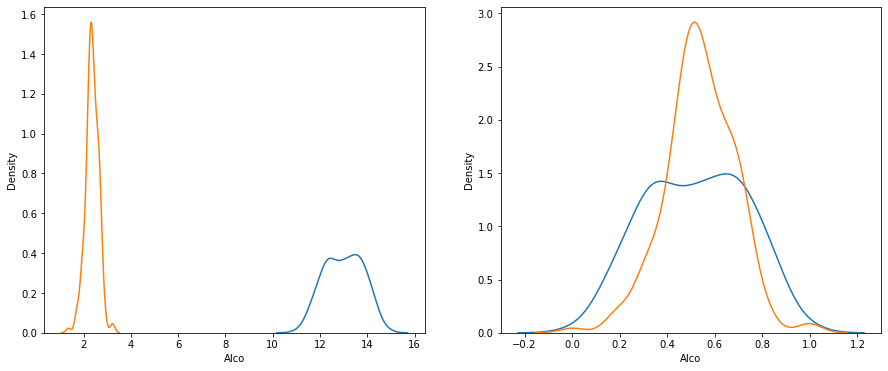

In [907]:
fir=plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.kdeplot(f['Alco'])
sns.kdeplot(f['vian'])
plt.subplot(1,2,2)
sns.kdeplot(xlabel['Alco'])
sns.kdeplot(xlabel['vian'])

In [922]:
a=pd.read_csv("customer.csv")
a

,age,gender,review,education,purchased
0,30,Female,Average,School,No
1,68,Female,Poor,UG,No
2,70,Female,Good,PG,No
3,72,Female,Good,PG,No
4,16,Female,Average,UG,No
5,31,Female,Average,School,Yes
6,18,Male,Good,School,No
7,60,Female,Poor,School,Yes
8,65,Female,Average,UG,No
9,74,Male,Good,UG,Yes


In [923]:
a.describe()

,age
count,50.000000
mean,54.160000
std,25.658161
min,15.000000
25%,30.250000
50%,57.000000
75%,74.000000
max,98.000000


In [924]:
a=a.iloc[:,2:4]
a

,review,education
0,Average,School
1,Poor,UG
2,Good,PG
3,Good,PG
4,Average,UG
5,Average,School
6,Good,School
7,Poor,School
8,Average,UG
9,Good,UG


In [925]:
from sklearn.preprocessing import OrdinalEncoder

In [928]:
new=OrdinalEncoder(categories=[["Good","Average","Poor"],['UG','PG','School']])

In [929]:
new.fit(a)

OrdinalEncoder(categories=[['Good', 'Average', 'Poor'], ['UG', 'PG', 'School']])

In [931]:
xlabel=new.transform(a)

In [932]:
xlabel

array([[1., 2.],
       [2., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 2.],
       [0., 2.],
       [2., 2.],
       [1., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [2., 2.],
       [1., 2.],
       [2., 1.],
       [2., 0.],
       [2., 0.],
       [2., 0.],
       [0., 2.],
       [2., 1.],
       [1., 2.],
       [1., 1.],
       [2., 1.],
       [0., 2.],
       [1., 1.],
       [0., 2.],
       [2., 1.],
       [2., 1.],
       [2., 2.],
       [1., 0.],
       [1., 0.],
       [2., 2.],
       [1., 0.],
       [0., 1.],
       [1., 2.],
       [2., 2.],
       [0., 0.],
       [1., 1.],
       [0., 2.],
       [2., 1.],
       [0., 2.],
       [0., 1.],
       [0., 1.],
       [2., 1.],
       [1., 0.],
       [2., 1.],
       [2., 1.],
       [0., 1.],
       [0., 0.],
       [0., 0.]])

In [934]:
xlabel.shape

(50, 2)

# ONEHOTENCODER

In [941]:
a=pd.read_csv("cars.csv")
a

,brand,km_driven,fuel,owner,selling_price
0,Maruti,145500,Diesel,First Owner,450000
1,Skoda,120000,Diesel,Second Owner,370000
2,Honda,140000,Petrol,Third Owner,158000
3,Hyundai,127000,Diesel,First Owner,225000
4,Maruti,120000,Petrol,First Owner,130000
...,...,...,...,...,...
8123,Hyundai,110000,Petrol,First Owner,320000
8124,Hyundai,119000,Diesel,Fourth & Above Owner,135000
8125,Maruti,120000,Diesel,First Owner,382000
8126,Tata,25000,Diesel,First Owner,290000


In [946]:
a['fuel'].value_counts()

Diesel    4402
Petrol    3631
CNG         57
LPG         38
Name: fuel, dtype: int64

In [947]:
pd.get_dummies(a,columns=['fuel'])

,brand,km_driven,owner,selling_price,fuel_CNG,fuel_Diesel,fuel_LPG,fuel_Petrol
0,Maruti,145500,First Owner,450000,0,1,0,0
1,Skoda,120000,Second Owner,370000,0,1,0,0
2,Honda,140000,Third Owner,158000,0,0,0,1
3,Hyundai,127000,First Owner,225000,0,1,0,0
4,Maruti,120000,First Owner,130000,0,0,0,1
...,...,...,...,...,...,...,...,...
8123,Hyundai,110000,First Owner,320000,0,0,0,1
8124,Hyundai,119000,Fourth & Above Owner,135000,0,1,0,0
8125,Maruti,120000,First Owner,382000,0,1,0,0
8126,Tata,25000,First Owner,290000,0,1,0,0


In [950]:
pd.get_dummies(a,columns=['fuel','owner'],drop_first=True)

,brand,km_driven,selling_price,fuel_Diesel,fuel_LPG,fuel_Petrol,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
0,Maruti,145500,450000,1,0,0,0,0,0,0
1,Skoda,120000,370000,1,0,0,0,1,0,0
2,Honda,140000,158000,0,0,1,0,0,0,1
3,Hyundai,127000,225000,1,0,0,0,0,0,0
4,Maruti,120000,130000,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
8123,Hyundai,110000,320000,0,0,1,0,0,0,0
8124,Hyundai,119000,135000,1,0,0,1,0,0,0
8125,Maruti,120000,382000,1,0,0,0,0,0,0
8126,Tata,25000,290000,1,0,0,0,0,0,0


In [949]:
from sklearn.preprocessing import OneHotEncoder

In [953]:
new=OneHotEncoder(drop="first",sparse=False)

In [956]:
xlabel=new.fit_transform(a[['fuel','owner']])

In [958]:
xlabel

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 1.],
       ...,
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.]])